In [1]:
# Converting layers to object
# initialise library
import numpy as np
import matplotlib as plt

print("Numpy:", np.__version__)
print("Matplotlib", plt.__version__)

!pip install nnfs

Numpy: 1.23.5
Matplotlib 3.7.2


**The Softmax Activation Function**
* In our case, we’re looking to get this model to be a classifier, so we want an activation function
meant for classification. One of these is the Softmax activation function.
* Why use Softmax you might ask? 
* It just depends on what our overall goals are. In this
case, the rectified linear unit is unbounded, not normalized with other units, and exclusive. “Not
normalized” implies the values can be anything, an output of [12, 99, 318] is without context,
and “exclusive” means each output is independent of the others.
* To address this lack of context,
the softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and
produce a normalized distribution of probabilities for our classes.
* . In the case of classification,
what we want to see is a prediction of which class the network “thinks” the input represents. This
distribution returned by the softmax activation function represents confidence scores for each
class and will add up to 1.
* The predicted class is associated with the output neuron that returned
the largest confidence score. 


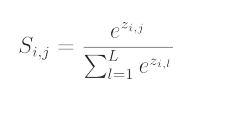

* The first step for us is to “exponentiate” the outputs. We do this with Euler’s number, e, which is
roughly 2.71828182846 and referred to as the “exponential growth” number. 
* Exponentiating is
taking this constant E to the power of the given parameter:
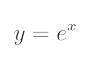

* Both the numerator and the denominator of the Softmax function contain e raised to the power of
z, where z, given indices, means a singular output value. The index i means the current sample
and the index j means the current output in this sample.

* The numerator exponentiates the current
output value and the denominator takes a sum of all of the exponentiated outputs for a given
sample

* Exponentiation serves multiple purposes. To calculate the probabilities, we need non-negative
values. Imagine the output as [4.8, 1.21, -2.385] — even after normalization, the last
value will still be negative since we’ll just divide all of them by their sum.
* A negative probability
(or confidence) does not make much sense. An exponential value of any number is always nonnegative — it returns 0 for negative infinity, 1 for the input of 0, and increases for positive values:
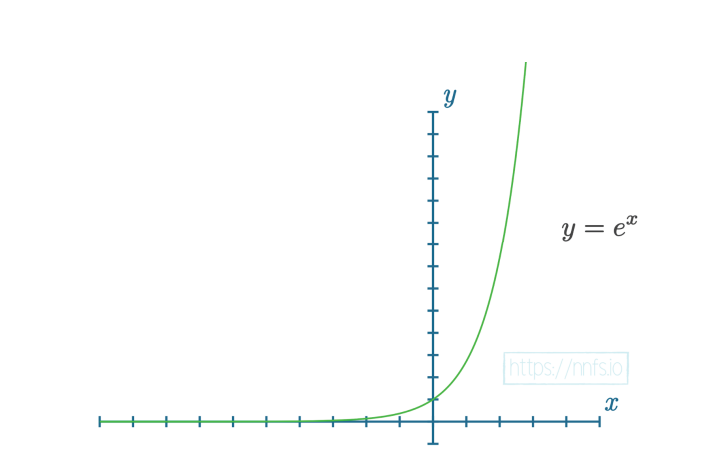

* The exponential function is a monotonic function. This means that, with higher input values,
outputs are also higher, so we won’t change the predicted class after applying it while making
sure that we get non-negative values. It also adds stability to the result as the normalized
exponentiation is more about the difference between numbers than their magnitudes.

* . Once we’ve
exponentiated, we want to convert these numbers to a probability distribution (converting the
values into the vector of confidences, one for each class, which add up to 1 for everything in the
vector).

* What that means is that we’re about to perform a normalization where we take a given
value and divide it by the sum of all of the values. For our outputs, exponentiated at this stage,
that’s what the equation of the Softmax function describes next — to take a given exponentiated
value and divide it by the sum of all of the exponentiated values. Since each output value
normalizes to a fraction of the sum, all of the values are now in the range of 0 to 1 and add up to 1
— they share the probability of 1 between themselves. 

In [2]:
import math

# We made up some values for our outputs
# Imagine this is our output values
layer_outputs = [4.8, 1.21, 2.385]
E = math.e

#exp_values = [] # non numpy implimentation
exp_values = np.exp(layer_outputs) # numpy implimentation

# non numpy implimentation
# for output in layer_outputs:
    # exp_values.append(E ** output) # ** denotes power in python

print('exponentiated values:')
print (exp_values)

# non numpy implimentation
# once we have exponentiated the values, we now normalize the values
# Normalization must me done after exponentiation to get rid of negatives

# norm_base = sum(exp_values) # denominator of the softmax function
# norm_values = [] 

# for value in exp_values:
    # norm_values.append(value / norm_base)

# Numpy implimentation
norm_values = exp_values / np.sum(exp_values)

print('Normalized exponentiated values:')
print(norm_values)
print('Sum of normalized values:', sum(norm_values))






exponentiated values:
[121.51041752   3.35348465  10.85906266]
Normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
Sum of normalized values: 0.9999999999999999
